<a href="https://colab.research.google.com/github/sabumjung/smartfactory/blob/master/IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

본 코드는 Isolation Forest를 이용한 Outlier을 자동으로 감지하기 위한 방법을 Python으로 구현한 내용입니다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [0]:
rng = np.random.RandomState(42)

In [0]:
# Generate train data(훈련데이터 - 100개)
X = 0.3 * rng.randn(100, 2)
# X데이터를 갖고 +2, -2를 수행함
# 대상 데이터를 행과행으로 붙이기 작업 수행
X_train = np.r_[X + 2, X - 2]
# 대상 데이터를 열과열로 붙이기 작업 수행 np.c_[a,b]

# Generate test data(테스트데이터 - 20개)
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal data(이상치데이터 - 20개)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [12]:
X_train.shape, X_test.shape, X_outliers.shape, 

((200, 2), (40, 2), (20, 2))

In [17]:
min(X_train[0]), min(X_train[1]),max(X_train[0]), max(X_train[1])

(1.9585207096486446, 2.1943065614302077, 2.14901424590337, 2.4569089569224074)

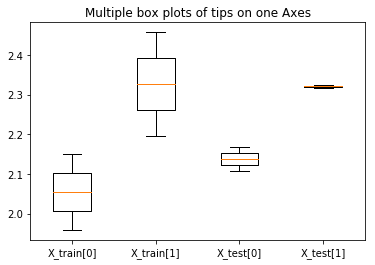

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.boxplot([X_train[0], X_train[1], X_test[0], X_test[1]], sym="b*")

plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2, 3, 4], 
           ['X_train[0]', 'X_train[1]','X_test[0]', 'X_test[1]'])
plt.show()

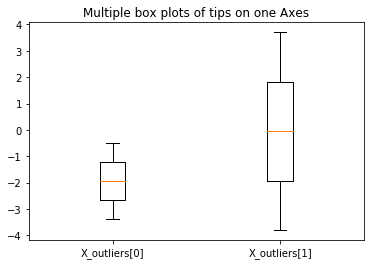

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.boxplot([X_outliers[0], X_outliers[1]], sym="b*")

plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2], 
           ['X_outliers[0]', 'X_outliers[1]'])
plt.show()

In [43]:
# fit the model(모델생성)
# max_samples의 값을 조정하게될 경우 outlier판정기준이 변경됨(작을수록 보다 tight한 구분이 됨)
clf = IsolationForest(behaviour='new', max_samples=100, random_state=rng, contamination='auto')
clf.fit(X_train)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=<mtrand.RandomState object at 0x7f69b37a5630>,
                verbose=0, warm_start=False)

In [0]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [47]:
y_pred_train, y_pred_test, y_pred_outliers

(array([ 1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
         1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
         1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
         1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
         1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
        -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,
        -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
         1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1]),
 array([ 1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        -1, -1,  1,  1, -1

In [0]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

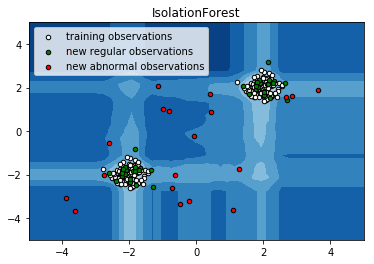

In [46]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations", "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()
